In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("salary_data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


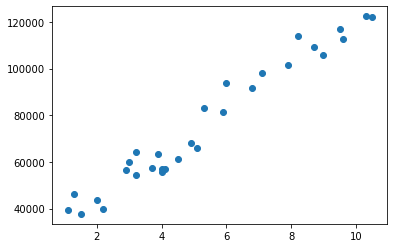

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data['YearsExperience'],data['Salary'])

SINCE OUR DATA IS SORTED (YEARS EXPERIENCE) SO WE NEED TO SHUFFLE IT 

In [6]:
data = data.sample(frac = 1)

In [8]:
data.head()

,YearsExperience,Salary
11,4.0,55794
8,3.2,64445
5,2.9,56642
7,3.2,54445
3,2.0,43525


SPLITTING THE DATA 

TRAINING DATA

In [9]:
data_train  = data.iloc[0 : 20 , [0 , 1]]

data_train.head()

,YearsExperience,Salary
11,4.0,55794
8,3.2,64445
5,2.9,56642
7,3.2,54445
3,2.0,43525


TEST DATA

In [10]:
data_test = data.iloc[20 : ]

In [11]:
data_test

,YearsExperience,Salary
28,10.3,122391
0,1.1,39343
16,5.1,66029
13,4.1,57081
22,7.9,101302
1,1.3,46205
19,6.0,93940
26,9.5,116969
6,3.0,60150
27,9.6,112635


ADDING ADDITIONAL COLUMNS REQUIRED FOR CALCULATING THE SLOPE AND INTERCEPT

In [12]:
data_train['(YearsExperience)^2'] = data_train['YearsExperience']**2

data_train['(Salary)^2'] = data_train['Salary']**2

data_train['YE * Salary'] = data_train['YearsExperience'] * data_train['Salary']

In [13]:
data_train.head()

,YearsExperience,Salary,(YearsExperience)^2,(Salary)^2,YE * Salary
11,4.0,55794,16.00,3112970436,223176.0
8,3.2,64445,10.24,4153158025,206224.0
5,2.9,56642,8.41,3208316164,164261.8
7,3.2,54445,10.24,2964258025,174224.0
3,2.0,43525,4.00,1894425625,87050.0


REQUIREMENTS FOR THE SLOPE AND INTERCEPT

In [14]:
A = data_train['YearsExperience'].sum()
B = data_train['Salary'].sum()

In [15]:
x = data_train['(YearsExperience)^2'] .sum()

y = data_train['(Salary)^2'].sum()

z = data_train['YE * Salary'].sum()

SLOPE AND INTERCEPT

In [16]:
slope = ((20*z) - (A*B)) / ((20 * x) - (A*A))

intercept = ((B*x) - (A*z)) / ((20*x) - (A*A))

print('SLOPE : ' , slope , 'INTERCEPT : ' , intercept)

SLOPE :  9860.446639597623 INTERCEPT :  23160.48330404209


MAKING PREDICTION FOR THE TEST DATA 

In [17]:
data_test['Predicted Values'] = (slope * data_test['YearsExperience'] + intercept)

data_test

<ipython-input-17-f04953053ee5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Predicted Values'] = (slope * data_test['YearsExperience'] + intercept)


,YearsExperience,Salary,Predicted Values
28,10.3,122391,124723.083692
0,1.1,39343,34006.974608
16,5.1,66029,73448.761166
13,4.1,57081,63588.314526
22,7.9,101302,101058.011757
1,1.3,46205,35979.063936
19,6.0,93940,82323.163142
26,9.5,116969,116834.726380
6,3.0,60150,52741.823223
27,9.6,112635,117820.771044


PLOTTING THE DATA

In [18]:
import matplotlib.pyplot as plt  

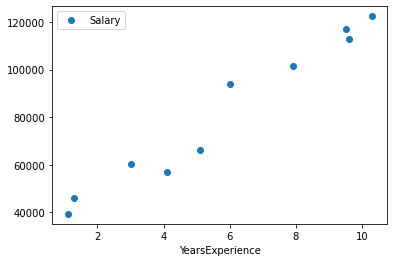

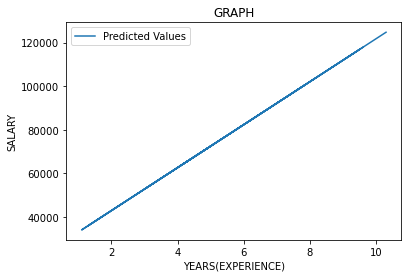

In [20]:
data_test.plot(x = 'YearsExperience' , y = 'Salary' , style = 'o')

data_test.plot(x = 'YearsExperience' , y = 'Predicted Values' , style = '-')

plt.title('GRAPH') 

plt.xlabel('YEARS(EXPERIENCE)')  

plt.ylabel('SALARY')  

plt.legend()

plt.show()
